<a href="https://colab.research.google.com/github/igbokwewinnie/PRODIGY_ML_03/blob/main/CatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"igbokwewinnie","key":"94203d4a7fbf6ea79032c0229efd7c81"}'}

In [4]:
#create a kaggle folder
! mkdir  ~/.kaggle



In [5]:
! cp kaggle.json ~/.kaggle/


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d chetankv/dogs-cats-images

100% 433M/435M [00:05<00:00, 71.6MB/s]
100% 435M/435M [00:05<00:00, 80.3MB/s]


In [ ]:
!unzip dogs-cats-images.zip

In [ ]:
!pip install tensorflow-gpu


In [10]:
#importing necessary libriares
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#performing data augmentation
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=(1/255.))

In [12]:
#loading dataset
training_set = train_datagen.flow_from_directory(
                                                '/content/dataset/training_set',
                                                 target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

test_set = test_datagen.flow_from_directory('/content/dataset/test_set',
                                            target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
#creating our model
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer, converting to svm
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [14]:
# Compiling our model
model.compile(optimizer = 'adam', loss = "hinge", metrics = ['accuracy'])
history = model.fit(x = training_set,validation_data = test_set,epochs=15)

Epoch 1/15
250/250 [==============================] - 32s 102ms/step - loss: 0.9306 - accuracy: 0.5447 - val_loss: 0.7463 - val_accuracy: 0.6435
Epoch 2/15
250/250 [==============================] - 25s 101ms/step - loss: 0.7438 - accuracy: 0.6484 - val_loss: 0.6767 - val_accuracy: 0.6705
Epoch 3/15
250/250 [==============================] - 25s 99ms/step - loss: 0.6957 - accuracy: 0.6725 - val_loss: 0.9757 - val_accuracy: 0.6330
Epoch 4/15
250/250 [==============================] - 25s 102ms/step - loss: 0.6587 - accuracy: 0.6892 - val_loss: 0.6026 - val_accuracy: 0.7355
Epoch 5/15
250/250 [==============================] - 25s 101ms/step - loss: 0.6138 - accuracy: 0.7132 - val_loss: 0.5791 - val_accuracy: 0.7380
Epoch 6/15
250/250 [==============================] - 25s 102ms/step - loss: 0.5843 - accuracy: 0.7283 - val_loss: 0.5612 - val_accuracy: 0.7460
Epoch 7/15
250/250 [==============================] - 25s 101ms/step - loss: 0.5620 - accuracy: 0.7383 - val_loss: 0.6016 - val_acc

In [ ]:
history.history['accuracy']
history.history['val_accuracy']

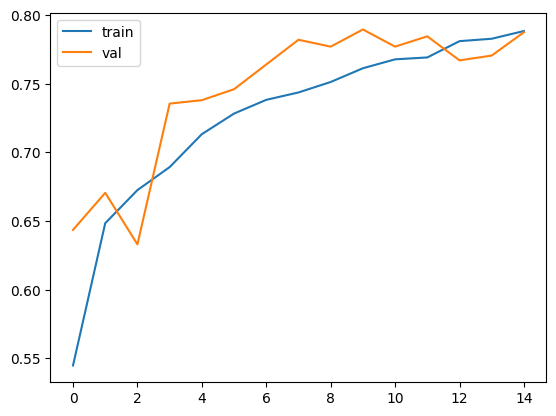

In [16]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

**Testing our model**

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import preprocess_input

In [19]:
test_set = test_datagen.flow_from_directory('/content/dataset/test_set',
                                            target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 2000 images belonging to 2 classes.


In [20]:
model.evaluate(test_set)

63/63 [==============================] - 3s 49ms/step - loss: 0.5021 - accuracy: 0.7875


[0.5021436214447021, 0.7875000238418579]

In [21]:
path = '/content/dataset/test_set/cats/cat.4004.jpg'

In [22]:
img = load_img(path, target_size=(64, 64))

In [23]:
import numpy as np


In [24]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 64, 64, 3)

In [25]:
X = preprocess_input(X)

In [26]:
pred = model.predict(X)

1/1 [==============================] - 0s 289ms/step


In [28]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [30]:
classes = [
    'cats',
 'dogs'
]

In [31]:
dict(zip(classes, pred[0]))

{'cats': -14.220568}